In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv("C:/Users/Morad/Desktop/projects/1/data/HICP - inflation rate.csv")

In [4]:
df_  = df.rename(columns={
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "inflation_rate"
})

In [5]:
df_["unit"].unique()

array(['Annual average rate of change'], dtype=object)

In [6]:
#df["year"].describe()  #2013-2024
# Max =  Germany - Czechia - Netherlands 
# Min =  Italy - Spain - Switzerland    

In [7]:
country= ["Germany" , "Switzerland" , "Czechia" , "Netherlands" , "Italy" , "Spain"]
f = (df_["country"].isin(country)) & (df_["year"]>2019)                  

df_inflation = df_.loc[ f,["country","year","inflation_rate"]]
df_inflation["year"].astype(int)
df_inflation

51     2020
52     2021
53     2022
54     2023
55     2024
75     2020
76     2021
77     2022
78     2023
79     2024
87     2020
88     2021
89     2022
90     2023
91     2024
159    2020
160    2021
161    2022
162    2023
163    2024
255    2020
256    2021
257    2022
258    2023
259    2024
336    2020
337    2021
338    2022
339    2023
340    2024
Name: year, dtype: int32

In [8]:
inflation_pivo = df_inflation.pivot(index = "year" , columns = "country", values = "inflation_rate")
inflation_pivo

country,Czechia,Germany,Italy,Netherlands,Spain,Switzerland
year,,,,,,
2020,3.3,0.4,-0.1,1.1,-0.3,-0.8
2021,3.3,3.2,1.9,2.8,3.0,0.5
2022,14.8,8.7,8.7,11.6,8.3,2.7
2023,12.0,6.0,5.9,4.1,3.4,2.3
2024,2.7,2.5,1.1,3.2,2.9,1.1


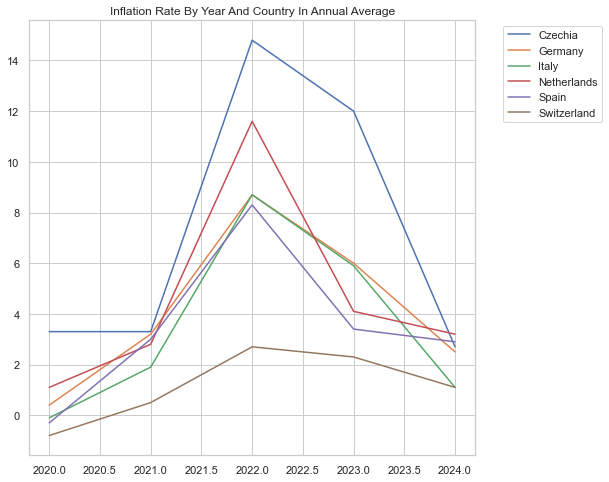

In [10]:
sns.set_theme(style = "whitegrid")
fig, axs = plt.subplots(figsize=(8, 8))                              
axs.plot( inflation_pivo["Czechia"]     , label='Czechia')
axs.plot( inflation_pivo["Germany"]     , label='Germany')          
axs.plot( inflation_pivo["Italy"]       , label='Italy')
axs.plot( inflation_pivo["Netherlands"] , label='Netherlands')  
axs.plot( inflation_pivo["Spain"]       , label='Spain')
axs.plot( inflation_pivo["Switzerland"] , label='Switzerland') 

axs.set_title('Inflation Rate By Year And Country In Annual Average')

axs.legend(bbox_to_anchor= (1.05,1), loc ="upper left")

'The Iflation Rate Distribution Graphs By Country'

<Figure size 720x1080 with 0 Axes>

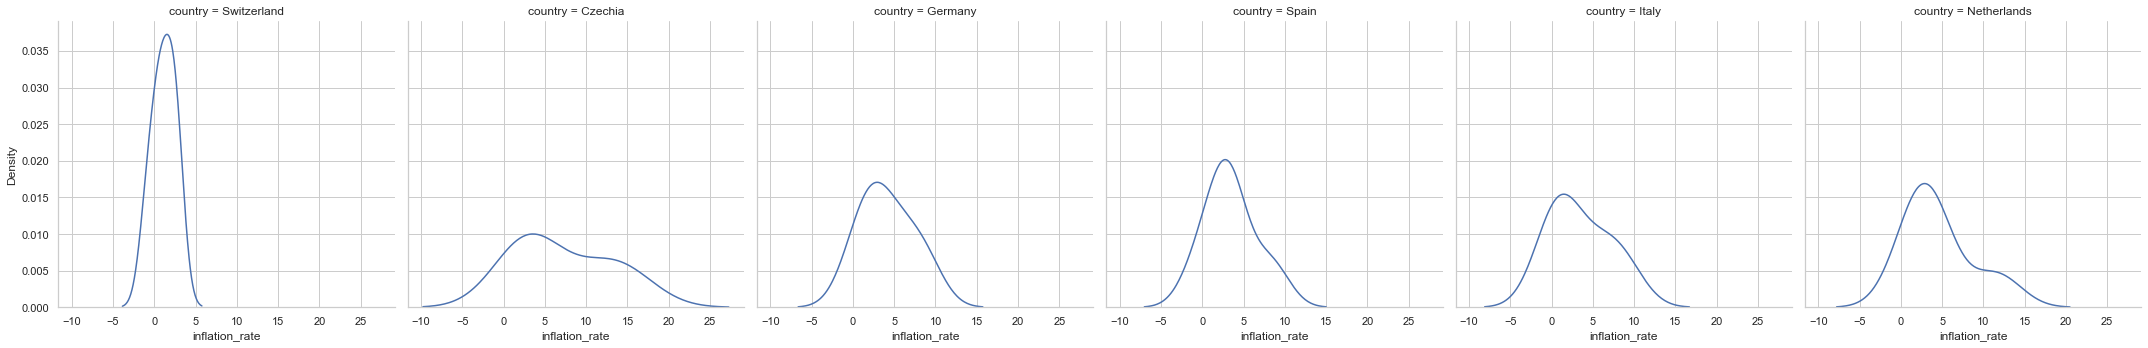

In [11]:
plt.figure(figsize = (10,15))
sns.displot(data = df_inflation, x = "inflation_rate" , col = "country",kind = "kde", palette = "Set2")    #to_do 
("The Iflation Rate Distribution Graphs By Country")


In [12]:
new_1 =df_inflation.groupby("country")["inflation_rate"].agg(["mean"]).sort_values("mean",ascending = True)

In [13]:
new_2 = df_inflation.groupby("country")["inflation_rate"].agg(["std"]).sort_values("std",ascending = True).round(2)

In [14]:
new_3 = df_inflation.groupby("country")["inflation_rate"].agg(["max"]).sort_values("max",ascending = True)

In [15]:
new_4 = df_inflation.groupby("country")["inflation_rate"].agg(["min"]).sort_values("min",ascending = True) 

In [16]:
inflation_rate_table  = new_4.join([new_1,new_2,new_3])              #table
inflation_rate_table

,min,mean,std,max
country,,,,
Switzerland,-0.8,1.16,1.41,2.7
Spain,-0.3,3.46,3.09,8.3
Italy,-0.1,3.50,3.68,8.7
Germany,0.4,4.16,3.23,8.7
Netherlands,1.1,4.56,4.08,11.6
Czechia,2.7,7.22,5.73,14.8


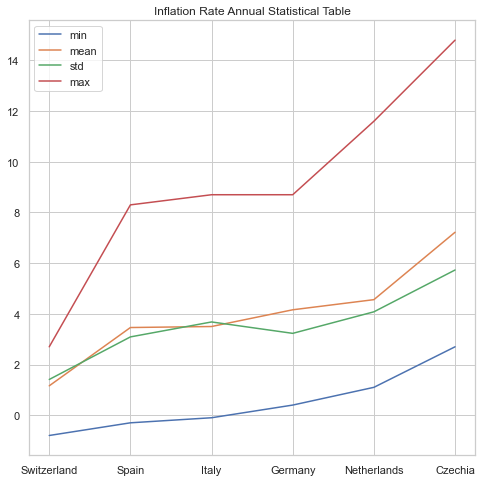

In [17]:
fig, axs = plt.subplots(figsize=(8, 8))                              #table_figure     
axs.plot( inflation_rate_table["min"], label='min')
axs.plot( inflation_rate_table["mean"], label='mean')
axs.plot( inflation_rate_table["std"], label='std')
axs.plot( inflation_rate_table["max"], label='max')
axs.set_title('Inflation Rate Annual Statistical Table')
axs.legend()

In [66]:
sns.set_theme(style = "whitegrid")

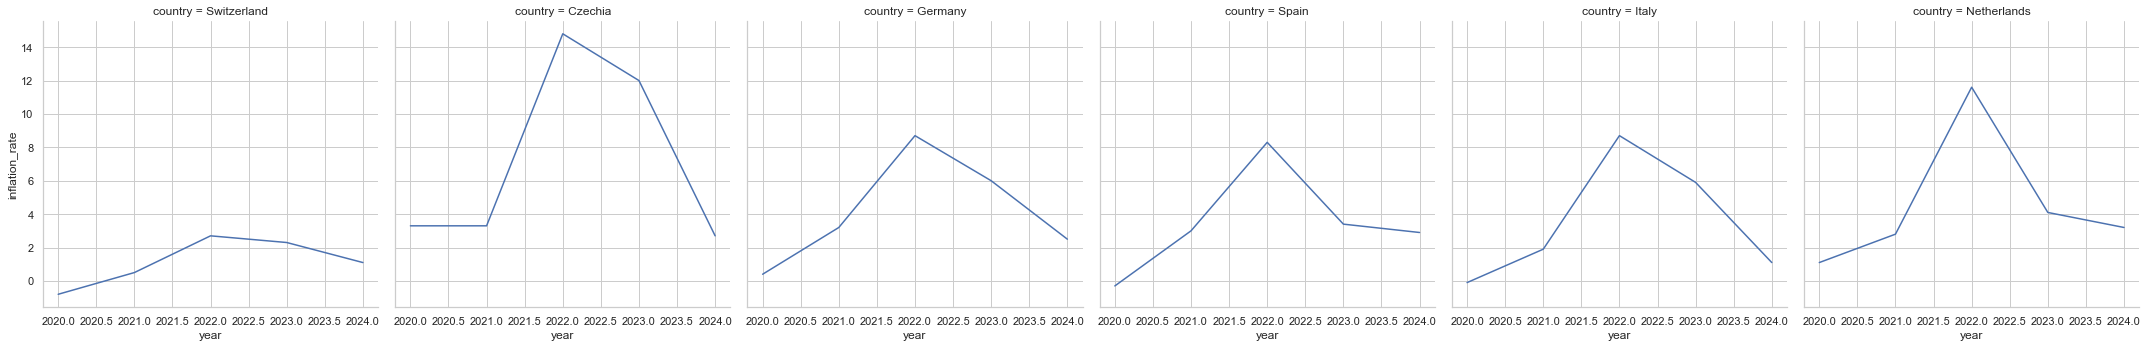

In [67]:

sns.relplot(data = df_inflation, x = "year", y = "inflation_rate" , col = "country",kind = "line")            #Line chart



Text(0.5, 1.0, 'Iflation comparison by year')

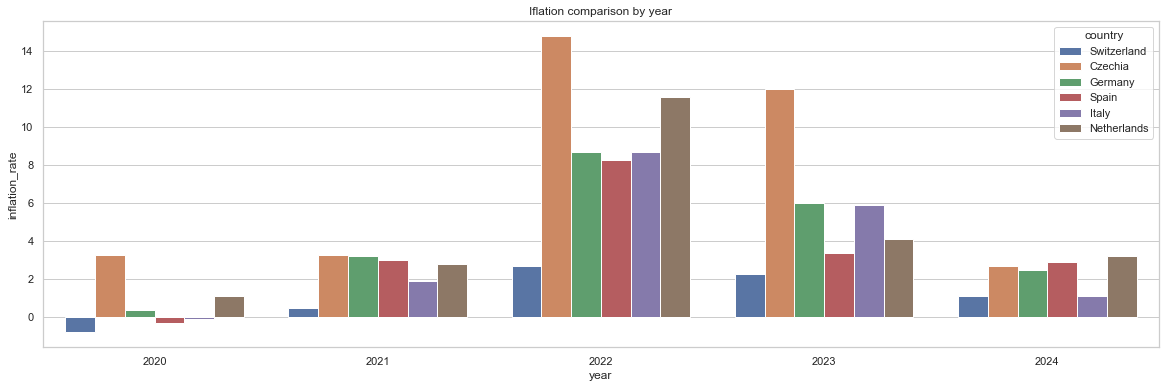

In [68]:
plt.figure(figsize = (20,6))
sns.barplot(data = df_inflation,x = "year",y = "inflation_rate", hue = "country",  )          #Bar chart
plt.title("Inflation comparison by year")

Text(0.5, 1.0, 'Inflation Heatmap in Europe')

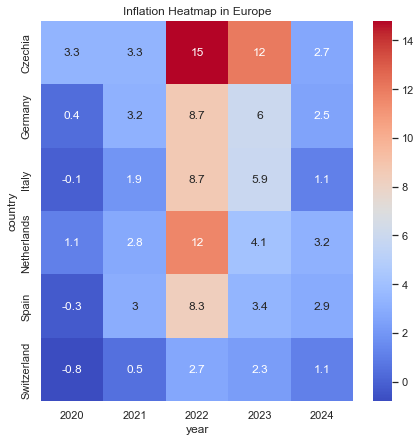

In [41]:

pivot = df_inflation.pivot(index = "country", columns = "year", values = "inflation_rate")
plt.figure(figsize= (7,7))
sns.heatmap( pivot, annot = True ,cmap = "coolwarm")
plt.title("Inflation Heatmap in Europe")


Text(0.5, 1.0, 'Distribution Of Inflation Rates By Year')

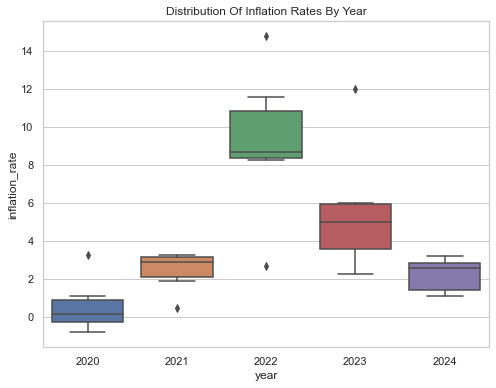

In [70]:
plt.figure(figsize= (8,6))
sns.boxplot( data = df_inflation, x = "year",y = "inflation_rate", )
plt.title("Distribution Of Inflation Rates By Year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

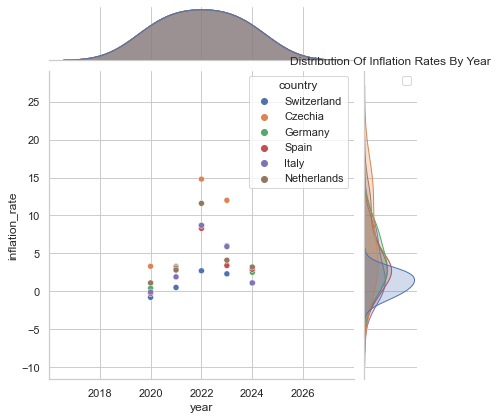

In [53]:

plt.figure(figsize = (10,10))

sns.jointplot(data = df_inflation, x = "year", y = "inflation_rate", hue = "country")

plt.title("Distribution Of Inflation Rates By Year")
plt.legend()


<AxesSubplot:xlabel='inflation_rate', ylabel='year'>

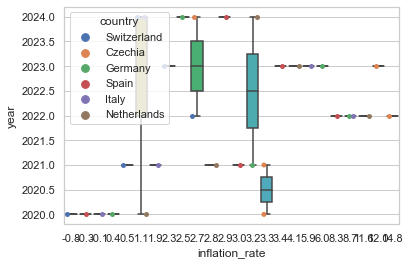

In [77]:
sns.boxplot(data = df_inflation , 
          x = "inflation_rate",
          y = "year",
           )

sns.swarmplot(data =  df_inflation, 
               x = "inflation_rate", 
               y = "year" ,
           hue = "country",
              dodge = True,
              
           )

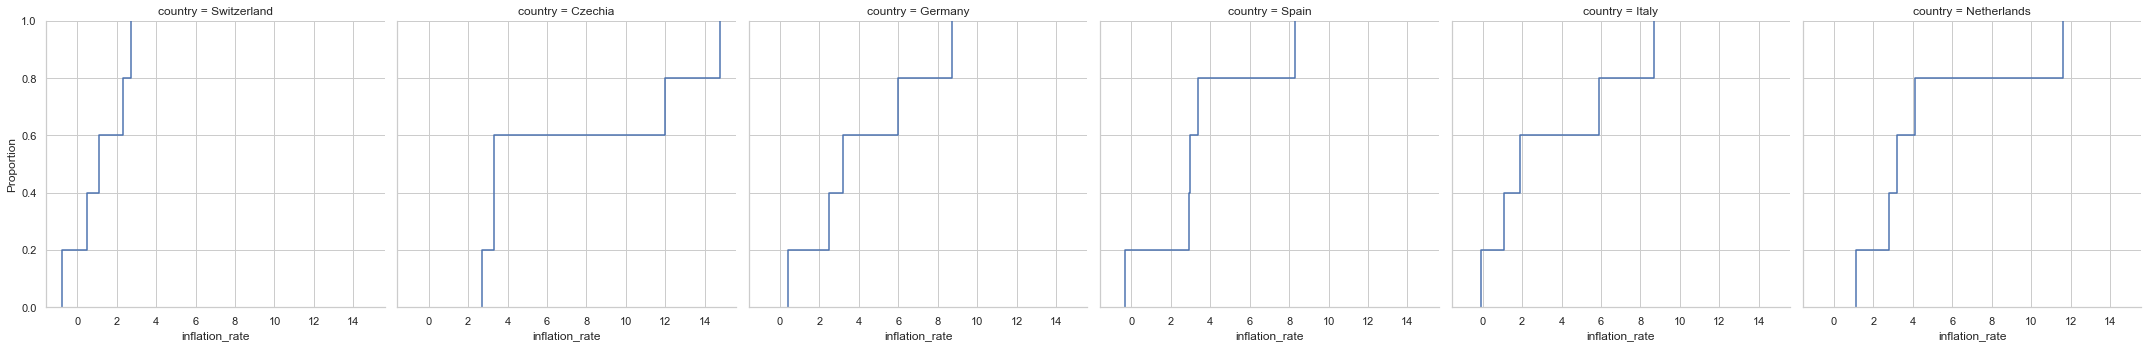

In [78]:
sns.displot(data = df_inflation, x = "inflation_rate", col = "country" , kind= "ecdf")


In [22]:
inflation_rate_table["stability"] = ["stable" if x <1 else "volatile" for x in inflation_rate_table["std"]]
inflation_rate_table

,min,mean,std,max,stability
country,,,,,
Switzerland,-0.8,1.16,1.41,2.7,volatile
Spain,-0.3,3.46,3.09,8.3,volatile
Italy,-0.1,3.50,3.68,8.7,volatile
Germany,0.4,4.16,3.23,8.7,volatile
Netherlands,1.1,4.56,4.08,11.6,volatile
Czechia,2.7,7.22,5.73,14.8,volatile


Text(0.5, 1.0, 'Inflation Volatility By Country')

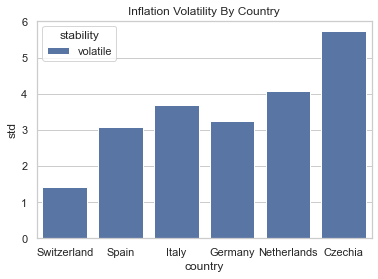

In [103]:
sns.barplot(data = inflation_rate_table.reset_index() , x = "country" , y = "std", hue ="stability")
plt.title("Inflation Volatility By Country")